In [116]:
import pandas as pd
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn  as sns



df = pd.read_csv('ds_salaries.csv',delimiter=',')
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S


In [18]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [39]:
#1.- El promedio general de los salarios, desviación estándar, quintiles y rango.
# Promedio
df['salary_in_usd'].mean()

137570.38988015978

In [40]:
#Desviación Estándar
df['salary_in_usd'].std()


63055.625278224084

In [41]:
#Cuartiles
df['salary_in_usd'].quantile(0.25)

95000.0

In [42]:
df['salary_in_usd'].quantile(0.5)

135000.0

In [43]:
df['salary_in_usd'].quantile(0.75)

175000.0

In [99]:
minimo = df['salary_in_usd'].min() 
maximo = df['salary_in_usd'].max()

Rango = maximo-minimo
Rango


444868

In [ ]:
#2. Una comparación entre los salarios agrupados por 3 diferentes categorías a tu elección. ¿Para cuál de ellas las medidas de tendencia central son más
#representativas? ¿Para cuál son menos representativas? Explica.

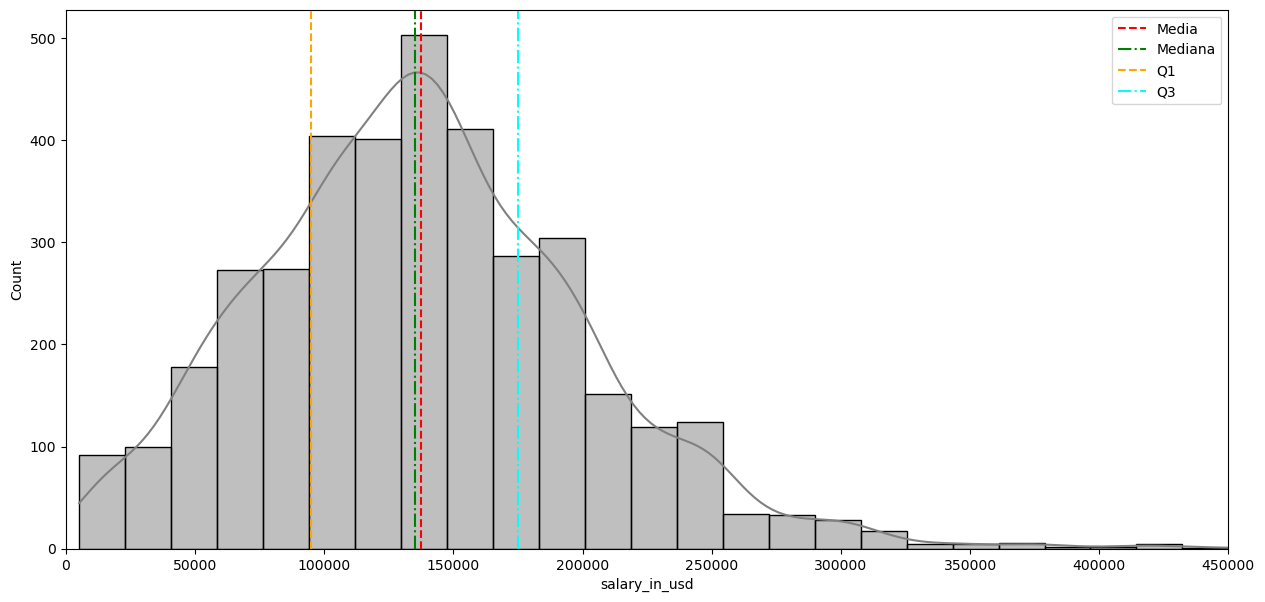

In [97]:
fig, axes = plt.subplots(nrows = 1,figsize=(15,7))
seaborn.histplot(df['salary_in_usd'],bins=25,color='gray', kde= True)
plt.xlim(0,450000)


axes.axvline(df['salary_in_usd'].mean(),color='red', linestyle = '--',label='Media')

axes.axvline(df['salary_in_usd'].median(),color='green', linestyle = '-.',label='Mediana')

axes.axvline(df['salary_in_usd'].quantile(0.25),color='orange', linestyle = '--',label='Q1')

axes.axvline(df['salary_in_usd'].quantile(0.75),color='cyan', linestyle = '-.',label='Q3')

axes.legend()




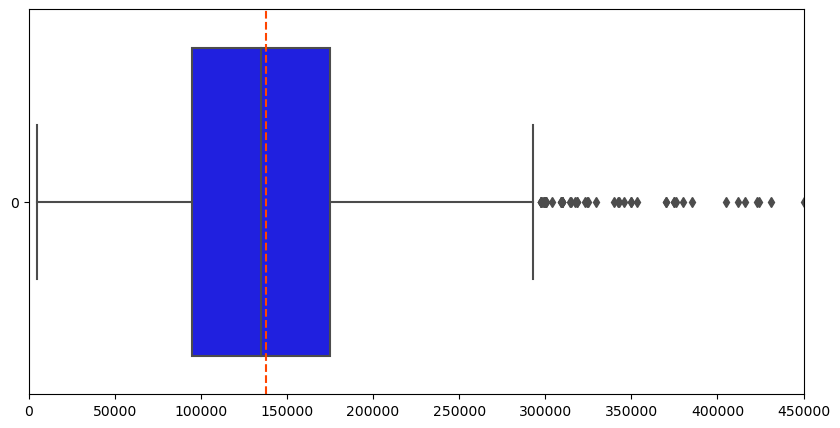

In [113]:
fig, axes = plt.subplots(nrows = 1,figsize=(10,5))
seaborn.boxplot(df['salary_in_usd'],color='blue',orient='h')
plt.xlim(0,450000)
axes.axvline(df['salary_in_usd'].mean(),color='orangered', linestyle = '--',label='Media')

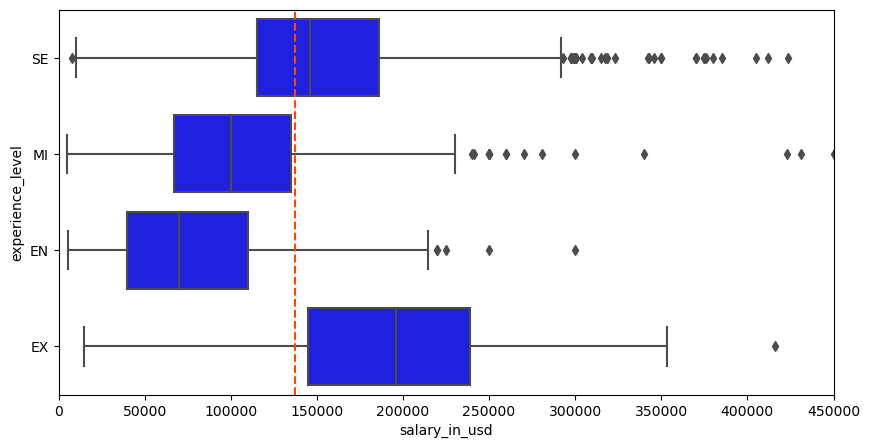

In [117]:
#experience_level

fig, axes = plt.subplots(nrows=1, figsize=(10, 5))
sns.boxplot(x='salary_in_usd', y='experience_level', data=df, color='blue', orient='h')
plt.xlim(0, 450000)
axes.axvline(df['salary_in_usd'].mean(), color='orangered', linestyle='--', label='Media')
plt.show()


In [130]:
tabla_pivote_experience_level = pd.pivot_table(df, values='salary_in_usd', index='experience_level' , aggfunc=['count','mean', 'median','std'])
tabla_pivote_experience_level

,count,mean,median,std
,salary_in_usd,salary_in_usd,salary_in_usd,salary_in_usd
experience_level,,,,
EN,320,78546.284375,70000,52225.424309
EX,114,194930.929825,196000,70661.929661
MI,805,104525.939130,100000,54387.685128
SE,2516,153051.071542,146000,56896.263954


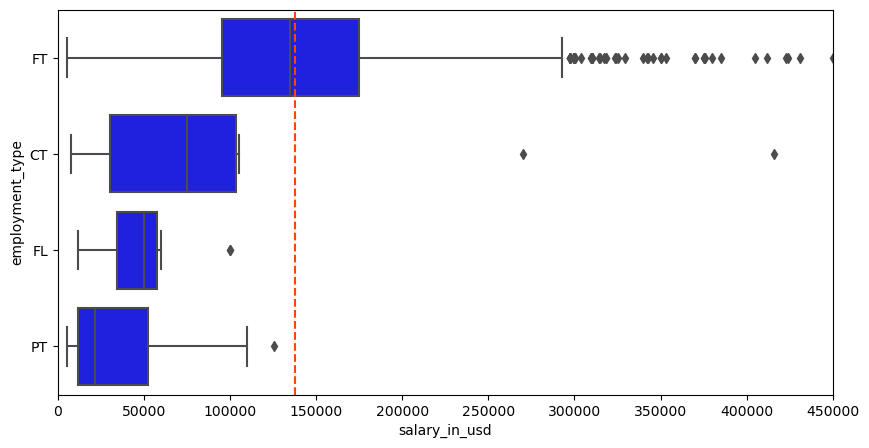

In [119]:
#employment_type
fig, axes = plt.subplots(nrows=1, figsize=(10, 5))
sns.boxplot(x='salary_in_usd', y='employment_type', data=df, color='blue', orient='h')
plt.xlim(0, 450000)
axes.axvline(df['salary_in_usd'].mean(), color='orangered', linestyle='--', label='Media')
plt.show()

In [126]:
tabla_pivote_employment_type = pd.pivot_table(df, values='salary_in_usd', index='employment_type' , aggfunc=['count','mean', 'median','std'])
tabla_pivote_employment_type

,count,mean,median,std
,salary_in_usd,salary_in_usd,salary_in_usd,salary_in_usd
employment_type,,,,
CT,10,113446.900000,75000,130176.746842
FL,10,51807.800000,50000,29458.879336
FT,3718,138314.199570,135000,62452.177613
PT,17,39533.705882,21669,38312.145181


In [ ]:
#remote_ratio

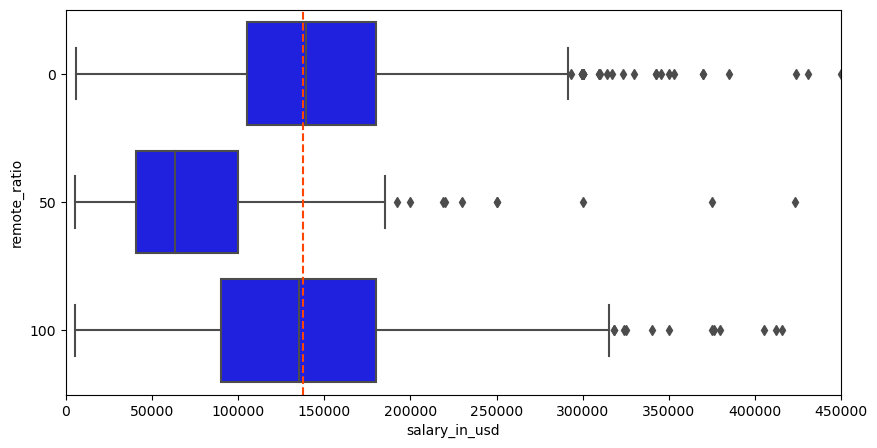

In [121]:
fig, axes = plt.subplots(nrows=1, figsize=(10, 5))
sns.boxplot(x='salary_in_usd', y='remote_ratio', data=df, color='blue', orient='h')
plt.xlim(0, 450000)
axes.axvline(df['salary_in_usd'].mean(), color='orangered', linestyle='--', label='Media')
plt.show()

In [127]:
tabla_pivote_remote_ratio = pd.pivot_table(df, values='salary_in_usd', index='remote_ratio' , aggfunc=['count','mean', 'median','std'])
tabla_pivote_remote_ratio

,count,mean,median,std
,salary_in_usd,salary_in_usd,salary_in_usd,salary_in_usd
remote_ratio,,,,
0,1923,144316.202288,139600,59799.970864
50,189,78400.687831,63312,61326.133522
100,1643,136481.452830,135000,63373.507699


In [ ]:
# De acuerdo a las categorias seleccionadas, que representan clasificadores de los salarios en usd, se puede observar que las
# 3 categorias
# concuerdan con una maypr cantidad de datos a la derecha. 
# Al revisar por categoria,employment_type esta concentradas en FT (tiempo completo) lo cual no es una buena medida usar para calculo
# tendencia central, ya que concentrada en demasia en una categoria.
# La categoria remote_ratio es la mejor categoria para usar medida de tendencia central, debido
# a que cuenta con una distribución no tanto en los extremos.
# En un nivel intermedio tenemos a experience_level





In [100]:
#3. ¿Qué cargos reciben mejores sueldos en las empresas con sede en Estados Unidos?


df_company_us = df[df['company_location'] == 'US']
df_company_us


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S


In [101]:
jobs = df_company_us.groupby('job_title')['salary_in_usd'].mean()
jobs

job_title
AI Developer                           200000.000000
AI Scientist                           113428.571429
Analytics Engineer                     159024.347826
Applied Data Scientist                 238000.000000
Applied Machine Learning Engineer      130000.000000
                                           ...      
Principal Machine Learning Engineer    190000.000000
Product Data Analyst                   120000.000000
Research Engineer                      168156.580645
Research Scientist                     179146.206897
Staff Data Scientist                   105000.000000
Name: salary_in_usd, Length: 70, dtype: float64

In [102]:
jobs.sort_values(ascending=False)
    

job_title
Data Analytics Lead          405000.000000
Data Science Tech Lead       375000.000000
Director of Data Science     294375.000000
Principal Data Scientist     255500.000000
Cloud Data Architect         250000.000000
                                 ...      
Data Quality Analyst          82863.333333
BI Data Analyst               82709.833333
Data Analytics Consultant     81500.000000
Big Data Engineer             70000.000000
BI Data Engineer              60000.000000
Name: salary_in_usd, Length: 70, dtype: float64

In [103]:
jobs.sort_values(ascending=False)[0:5].index

Index(['Data Analytics Lead', 'Data Science Tech Lead',
       'Director of Data Science', 'Principal Data Scientist',
       'Cloud Data Architect'],
      dtype='object', name='job_title')